In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

(array(['Reinforcement', 'Self-Supervised', 'Semi-Supervised',
       'Semi/Self-Supervised', 'Supervised', 'Supervised / Unsupervised',
       'Unsupervised'], dtype=object), array([ 3,  3,  1,  1, 15,  1, 11]))


NameError: name 'Line2D' is not defined

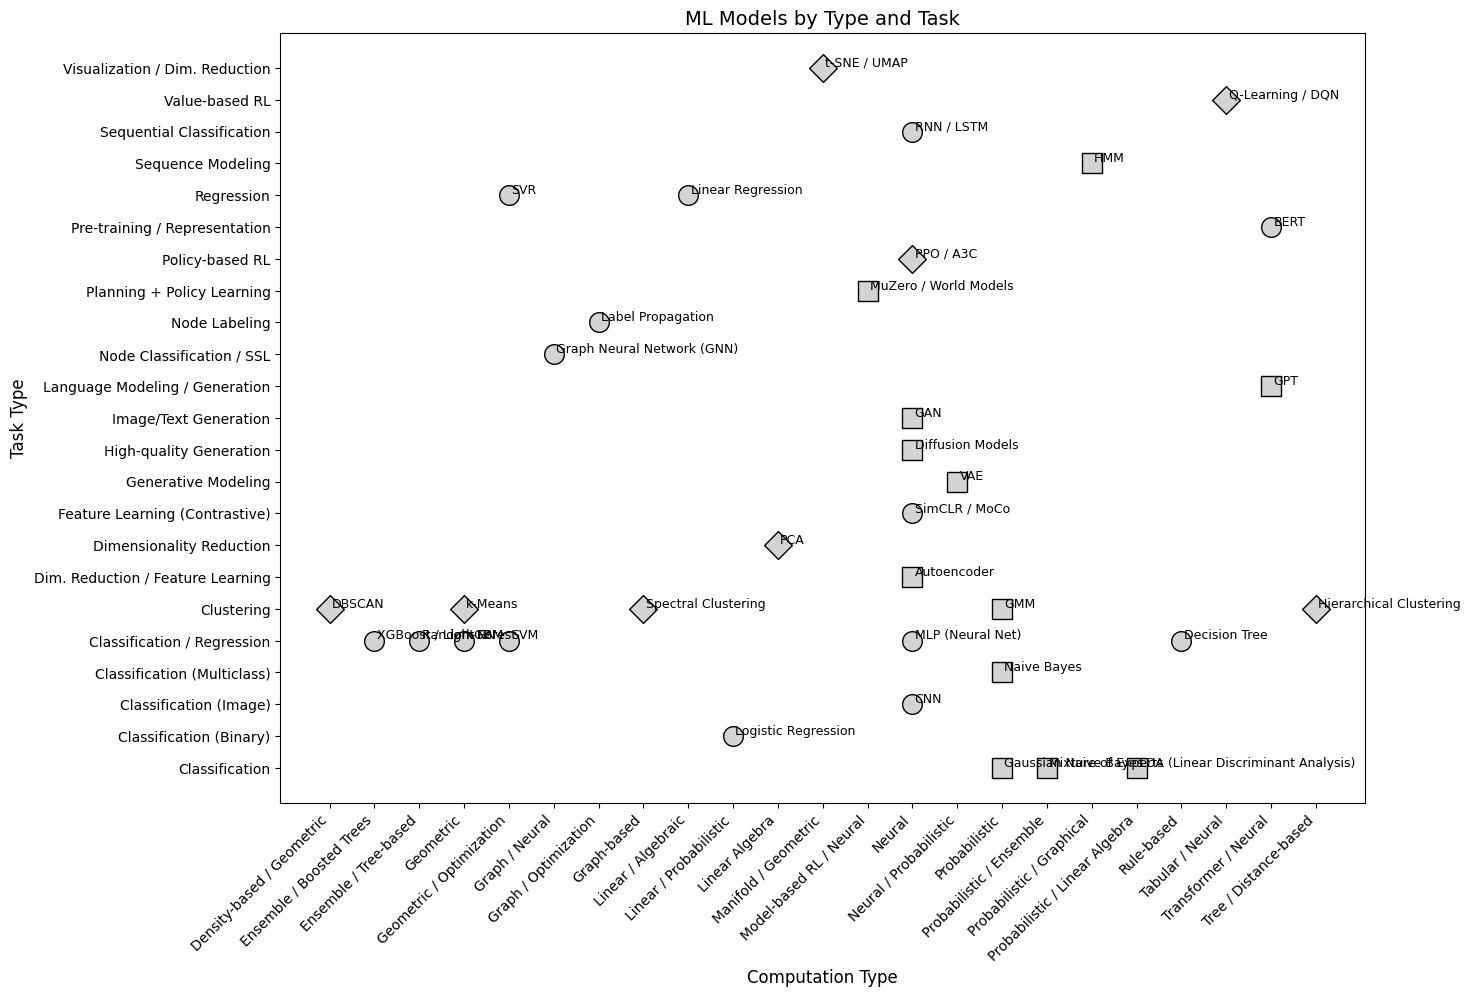

In [23]:
data = pd.read_csv("ML_Algorithm_Classification_Table.csv")
d = data.to_numpy()

print(np.unique(d[:, 1], return_counts = True))

mask = d[:, 1] == 'Supervised'
current_work = d[mask]
# print(current_work)

data = np.delete(d, 1, axis = 1)

names = data[:, 0]
model_type = data[:, 1]
x_vals = data[:, 2]
y_vals = data[:, 3]

# Unique labels for axes
x_unique = sorted(set(x_vals))
y_unique = sorted(set(y_vals))

x_map = {val: i for i, val in enumerate(x_unique)}
y_map = {val: i for i, val in enumerate(y_unique)}

# Marker for each model type
type_marker = {
    'Discriminative': 'o',
    'Generative': 's',
    '-': 'D'
}

plt.figure(figsize=(14, 10))

# Plotting each model
for i in range(len(data)):
    x = x_map[x_vals[i]]
    y = y_map[y_vals[i]]
    marker = type_marker.get(model_type[i], 'D')
    plt.scatter(x, y, marker=marker, s=200, edgecolors='black', facecolors='lightgray')
    plt.text(x + 0.05, y + 0.05, names[i], fontsize=9)

# Set axis ticks
plt.xticks(ticks=np.arange(len(x_unique)), labels=x_unique, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(y_unique)), labels=y_unique)
plt.xlabel("Computation Type", fontsize=12)
plt.ylabel("Task Type", fontsize=12)
plt.title("ML Models by Type and Task", fontsize=14)

# Legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Discriminative',
           markerfacecolor='gray', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='s', color='w', label='Generative',
           markerfacecolor='gray', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='D', color='w', label='Other',
           markerfacecolor='gray', markersize=10, markeredgecolor='k')
]
plt.legend(handles=legend_elements, title="Model Type")

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()